<center><img src="https://raw.githubusercontent.com/Mihir-Ai-lab/The_Data_Science_Guy/main/Images/Notebook%20Header.png" width="1200" height="627" /></center>

---
# **Table of Contents**
---

**1.** [**Introduction**](#Section1)<br>
**2.** [**Objective**](#Section2)<br>
**3.** [**Installing & Importing Libraries**](#Section3)<br>
  - **3.1** [**Installing Libraries**](#Section31)
  - **3.2** [**Upgrading Libraries**](#Section32)
  - **3.3** [**Importing Libraries**](#Section33)

**4.** [**Data Acquisition & Description**](#Section4)<br>
  - **4.1** [**Data Description**](#Section41)
  - **4.2** [**Data Information**](#Section42)

**5.** [**Data Pre-profiling**](#Section5)<br>

**6.** [**Data Pre-processing**](#Section6)<br>

  - **6.1** [**Handling Missing Values**](#Section61)<br>
  - **6.2** [**Handling Outliers**](#Section62)<br>
  - **6.3** [**Encoding Categorical Variables**](#Section63)<br>
  - **6.4** [**Feature Engineering**](#Section63)<br>    
  - **6.5** [**Feature Scaling**](#Section64)<br>

**7.** [**Feature Selection and PCA**](#Section7)<br>
  - **7.1** [**Feature Selection with Correlation Matrix**](#Section71)<br>
  - **7.2** [**Feature Transformation with PCA**](#Section72)<br>

**8.** [**Model Development & Evaluation**](#Section8)<br>
  - **8.1** [**Logistic Regression**](#Section81)<br>
  - **8.2** [**Decision Tree**](#Section82)<br>
  - **8.3** [**Random Forest**](#Section83)<br>
  - **8.4** [**Naive Bayes**](#Section84)<br>

**9.** [**Data Resampling with SMOTE**](#Section9)<br>

**10.** [**Feature Selection and PCA**](#Section10)<br>
  - **10.1** [**Feature Selection with Correlation Matrix**](#Section101)<br>
  - **10.2** [**Feature Transformation with PCA**](#Section102)<br>

**11.** [**Model Development & Evaluation with SMOTE & Tuned Hyperparameters**](#Section11)<br>
  - **11.1** [**Logistic Regression**](#Section111)<br>
  - **11.2** [**Decision Tree**](#Section112)<br>
  - **11.3** [**Random Forest**](#Section113)<br>
  - **11.4** [**Naive Bayes**](#Section114)<br>

**12.** [**Summary table of Model Evaluation Metrics**](#Section12)<br>

**13.** [**Conclusion**](#Section13)<br>

---
<a name = Section1></a>
# **1. Introduction**
---

We learnt about a few different kinds of Machine Learning Algorithms. :-

- Linear/Logistic Regression
- Decession Trees
- Random forest Classifier
- Naive Bayes

Under this we mainly understood :- 

- Thier pros & cons
- Evaluation Metrics (Precession, Recall, F1 score)
- Hyper Parameter Tuning (Solving for Bias/Variance & Over/Under-fitting)
- Data preparation for the models (SMOTE)
- Feature Scaling & Feature engineering techniques (PCA)
- Drawbacks of the models

Based on which we intend to make a summary notebook of what all we learnt. 

---
<a name = Section2></a>
# **2. Objective**
---

The main objective of this project is to explore and understand different machine learning algorithms and their applications in solving classification problems. Specifically, we aim to:

- Gain a comprehensive understanding of the pros and cons of each machine learning algorithm, including Linear/Logistic Regression, Decision Trees, Random Forest Classifier, and Naive Bayes.
- Learn how to evaluate the performance of each model using various evaluation metrics such as precision, recall, and F1 score.
- Explore techniques for hyperparameter tuning to prevent over/under-fitting and solve for bias/variance.
- Understand the importance of data preparation techniques such as SMOTE and feature scaling/engineering techniques such as PCA.
- Build and evaluate models using a loan dataset to predict whether a loan applicant will default or not, and compare the performance of different machine learning algorithms.
- Summarize what we have learned about each machine learning algorithm and its potential applications in solving real-world problems.

---
<a name = Section3></a>
# **3. Installing & Importing Libraries**
---

<a name = Section31></a>
### **3.1 Installing Libraries**

In [155]:
!pip install -q datascience                                         # Package that is required by pandas profiling
!pip install -q pandas-profiling                                    # Library to generate basic statistics about data
!pip install -q scikit-learn
!pip install -q matplotlib seaborn bokeh plotly

<a name = Section32></a>
### **3.2 Upgrading Libraries**

- **After upgrading** the libraries, you need to **restart the runtime** to make the libraries in sync. 

- Make sure not to execute the cell above (3.1) and below (3.2) again after restarting the runtime.

In [156]:
!pip install -q --upgrade pandas-profiling
!pip install -q --upgrade scikit-learn

<a name = Section33></a>
### **3.3 Importing Libraries**

In [157]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
from ydata_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis) 
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high      
pd.set_option('display.max_colwidth', None)                         # Unfolding the max feature width for better clearity      
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
pd.set_option('display.float_format', lambda x: '%.5f' % x)         # To suppress scientific notation over exponential values 
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib                                              
import seaborn as sns                                               # Importin seaborm library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.metrics import precision_recall_curve                  # For precision and recall metric estimation
from sklearn.metrics import classification_report                   # To generate complete report of evaluation metrics
from sklearn.metrics import confusion_matrix                        # To plot confusion matrix 
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split                # To split the data in training and testing part     
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB                       # To create a naive bayes model using algorithm
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once

---
<a name = Section4></a>
# **4. Data Acquisition & Description**
---

- This Data has been provided to us for training and it can be retrieved from the following link <a href = "https://raw.githubusercontent.com/vasudevgupta31/acadamic_datasets/master/loan/loan_train.csv">**link**</a>.

| Records | Features | Dataset Size |
| :-- | :-- | :-- |
| 614 | 12 | 58 KB| 

|Id|Feature|Description|
|:--|:--|:--|
|01|**Gender**|Applicants gender.|
|02|**Marital Status**|Applicants Marital Status.|
|03|**Dependents**|Applicants Dependent people.|
|04|**Education**|Applicants Education Status.|
|05|**Employment Status**|Applicants Employment Status.|
|06|**Applicants Income**|Applicants income.|
|07|**Co-Applicants Income**|Co-Applicants income.|
|08|**Loan Amount**|Loan amount applied for.|
|09|**Term**|Term of the applied loan.|
|10|**Credit History**|Applicants Credit History.|
|11|**Area**|Area from where loan is applied for.|
|12|**Status**|Wether Loan was approved or not.|

In [158]:
# Acquiring Data from "https://raw.githubusercontent.com/vasudevgupta31/acadamic_datasets/master/loan/loan_train.csv"

print('\n' + '-'*25 + '\n')
print('Acquiring Data' + '\n' + 'Loaded Dataset: df_loan')
print('\n' + '-'*25 + '\n')

df_loan = pd.read_csv(filepath_or_buffer = 'https://raw.githubusercontent.com/vasudevgupta31/acadamic_datasets/master/loan/loan_train.csv')

# Checking Shape & Head

print('Data Shape:',df_loan.shape)
print('\n' + '-'*25 + '\n')
print('Data Head')
print('\n' + '-'*10 + '\n')
df_loan.head(10)


-------------------------

Acquiring Data
Loaded Dataset: df_loan

-------------------------

Data Shape: (614, 12)

-------------------------

Data Head

----------



,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,Male,No,0,Graduate,No,584900,0.00000,15000000,360.00000,1.00000,Urban,Y
1,Male,Yes,1,Graduate,No,458300,150800.00000,12800000,360.00000,1.00000,Rural,N
2,Male,Yes,0,Graduate,Yes,300000,0.00000,6600000,360.00000,1.00000,Urban,Y
3,Male,Yes,0,Not Graduate,No,258300,235800.00000,12000000,360.00000,1.00000,Urban,Y
4,Male,No,0,Graduate,No,600000,0.00000,14100000,360.00000,1.00000,Urban,Y
5,Male,Yes,2,Graduate,Yes,541700,419600.00000,26700000,360.00000,1.00000,Urban,Y
6,Male,Yes,0,Not Graduate,No,233300,151600.00000,9500000,360.00000,1.00000,Urban,Y
7,Male,Yes,3+,Graduate,No,303600,250400.00000,15800000,360.00000,0.00000,Semiurban,N
8,Male,Yes,2,Graduate,No,400600,152600.00000,16800000,360.00000,1.00000,Urban,Y
9,Male,Yes,1,Graduate,No,1284100,1096800.00000,34900000,360.00000,1.00000,Semiurban,N


<a name = Section41></a>
### **4.1 Data Description**

- In this section we will get **description** and **statistics** about the data.

In [159]:
df_loan.describe()

,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History
count,614.00000,614.00000,614.00000,600.00000,564.00000
mean,540345.92834,162124.57980,14141042.34528,342.00000,0.84220
std,610904.16734,292624.83692,8815682.46440,65.12041,0.36488
min,15000.00000,0.00000,0.00000,12.00000,0.00000
25%,287750.00000,0.00000,9800000.00000,360.00000,1.00000
50%,381250.00000,118850.00000,12500000.00000,360.00000,1.00000
75%,579500.00000,229725.00000,16475000.00000,360.00000,1.00000
max,8100000.00000,4166700.00000,70000000.00000,480.00000,1.00000


- The count of all features is 614, which means there are no missing values in the numerical columns.
- The mean applicant income is 5,40,345 the mean co-applicant income is 1,62,124 and the mean loan amount is 1,41,41,040
- The standard deviation of the applicant income is 6,10,904. 
- The standard deviation of the co-applicant income is 2,92,625. 
- The standard deviation of the loan amount is 88,15,682.
- The minimum values of applicant income, co-applicant income and loan amount are 15,000, 0 and 0 respectively.
- The maximum applicant income is 81,00,000, the maximum co-applicant income is 41,66,700 and the maximum loan amount is 7,00,00,000.
- The credit history is binary (0 or 1) and the mean credit history is 0.84, indicating that most applicants have a credit history.

<a name = Section42></a>
### **4.2 Data Information**

- In this section we will get **information about the data** and see some observations.

In [160]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              601 non-null    object 
 1   Married             611 non-null    object 
 2   Dependents          599 non-null    object 
 3   Education           614 non-null    object 
 4   Self_Employed       582 non-null    object 
 5   Applicant_Income    614 non-null    int64  
 6   Coapplicant_Income  614 non-null    float64
 7   Loan_Amount         614 non-null    int64  
 8   Term                600 non-null    float64
 9   Credit_History      564 non-null    float64
 10  Area                614 non-null    object 
 11  Status              614 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 57.7+ KB


---
<a name = Section5></a>
# **5. Data Pre-Profiling**

In [161]:
# Detailed Profile Report of Loan Data for univariate analysis

profile = ProfileReport(df=df_loan) 

print('\n' + '-'*40 + '\n')
print('Loan Data Pre-profile Report Generated')
print('\n' + '-'*40 + '\n')


----------------------------------------

Loan Data Pre-profile Report Generated

----------------------------------------



In [162]:
#Loading profile report to frame

profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

---
<a name = Section6></a>
# **6. Data Pre-Processing**
---

Missing Values:

- Gender has 13 (2.1%) missing values
- Dependents has 15 (2.4%) missing values
- Self_Employed has 32 (5.2%) missing values
- Term has 14 (2.3%) missing values
- Credit_History has 50 (8.1%) missing values

We will handle missing values in the following way:

- For categorical variables: We will replace the missing values with the mode of the respective column.
- For numerical variables: We will replace the missing values with the median of the respective column.
- However, since Credit_History is highly correlated with Status, we will drop the rows with missing values for Credit_History instead of imputing them.

Redundant Data:

- The profile report indicates that there are no duplicate rows in the dataset. Hence, there is no need to handle redundant data.

In [163]:
# Creating a copy of the data before making any changes

prep_data = df_loan.copy(deep=True)

<a name = Section61></a>
### **6.1 Handling Missing Values**

In [164]:
# Drop rows with missing values in Credit_History column
print("Number of Rows before dropping:", prep_data.shape[0])
prep_data.dropna(subset=['Credit_History'], inplace=True)
print('\n' + '-'*40 + '\n')
print("Number of Rows after dropping:", prep_data.shape[0])
print('\n' + '-'*40 + '\n')

# Replace missing values in categorical columns with the mode
categorical_cols = prep_data.select_dtypes('object').columns
for col in categorical_cols:
    prep_data[col].fillna(prep_data[col].mode()[0], inplace=True)

# Replace missing values in numerical columns with the median
numerical_cols = prep_data.select_dtypes(['int', 'float']).columns
for col in numerical_cols:
    prep_data[col].fillna(prep_data[col].median(), inplace=True)
print("Other Missing Values imputed")

Number of Rows before dropping: 614

----------------------------------------

Number of Rows after dropping: 564

----------------------------------------

Other Missing Values imputed


 <a name = Section61></a>
### **6.2 Handling Outliers**


------------------------------------------------------------

Creating Box Plots to Identify Inconsistent Data and Outliers

------------------------------------------------------------



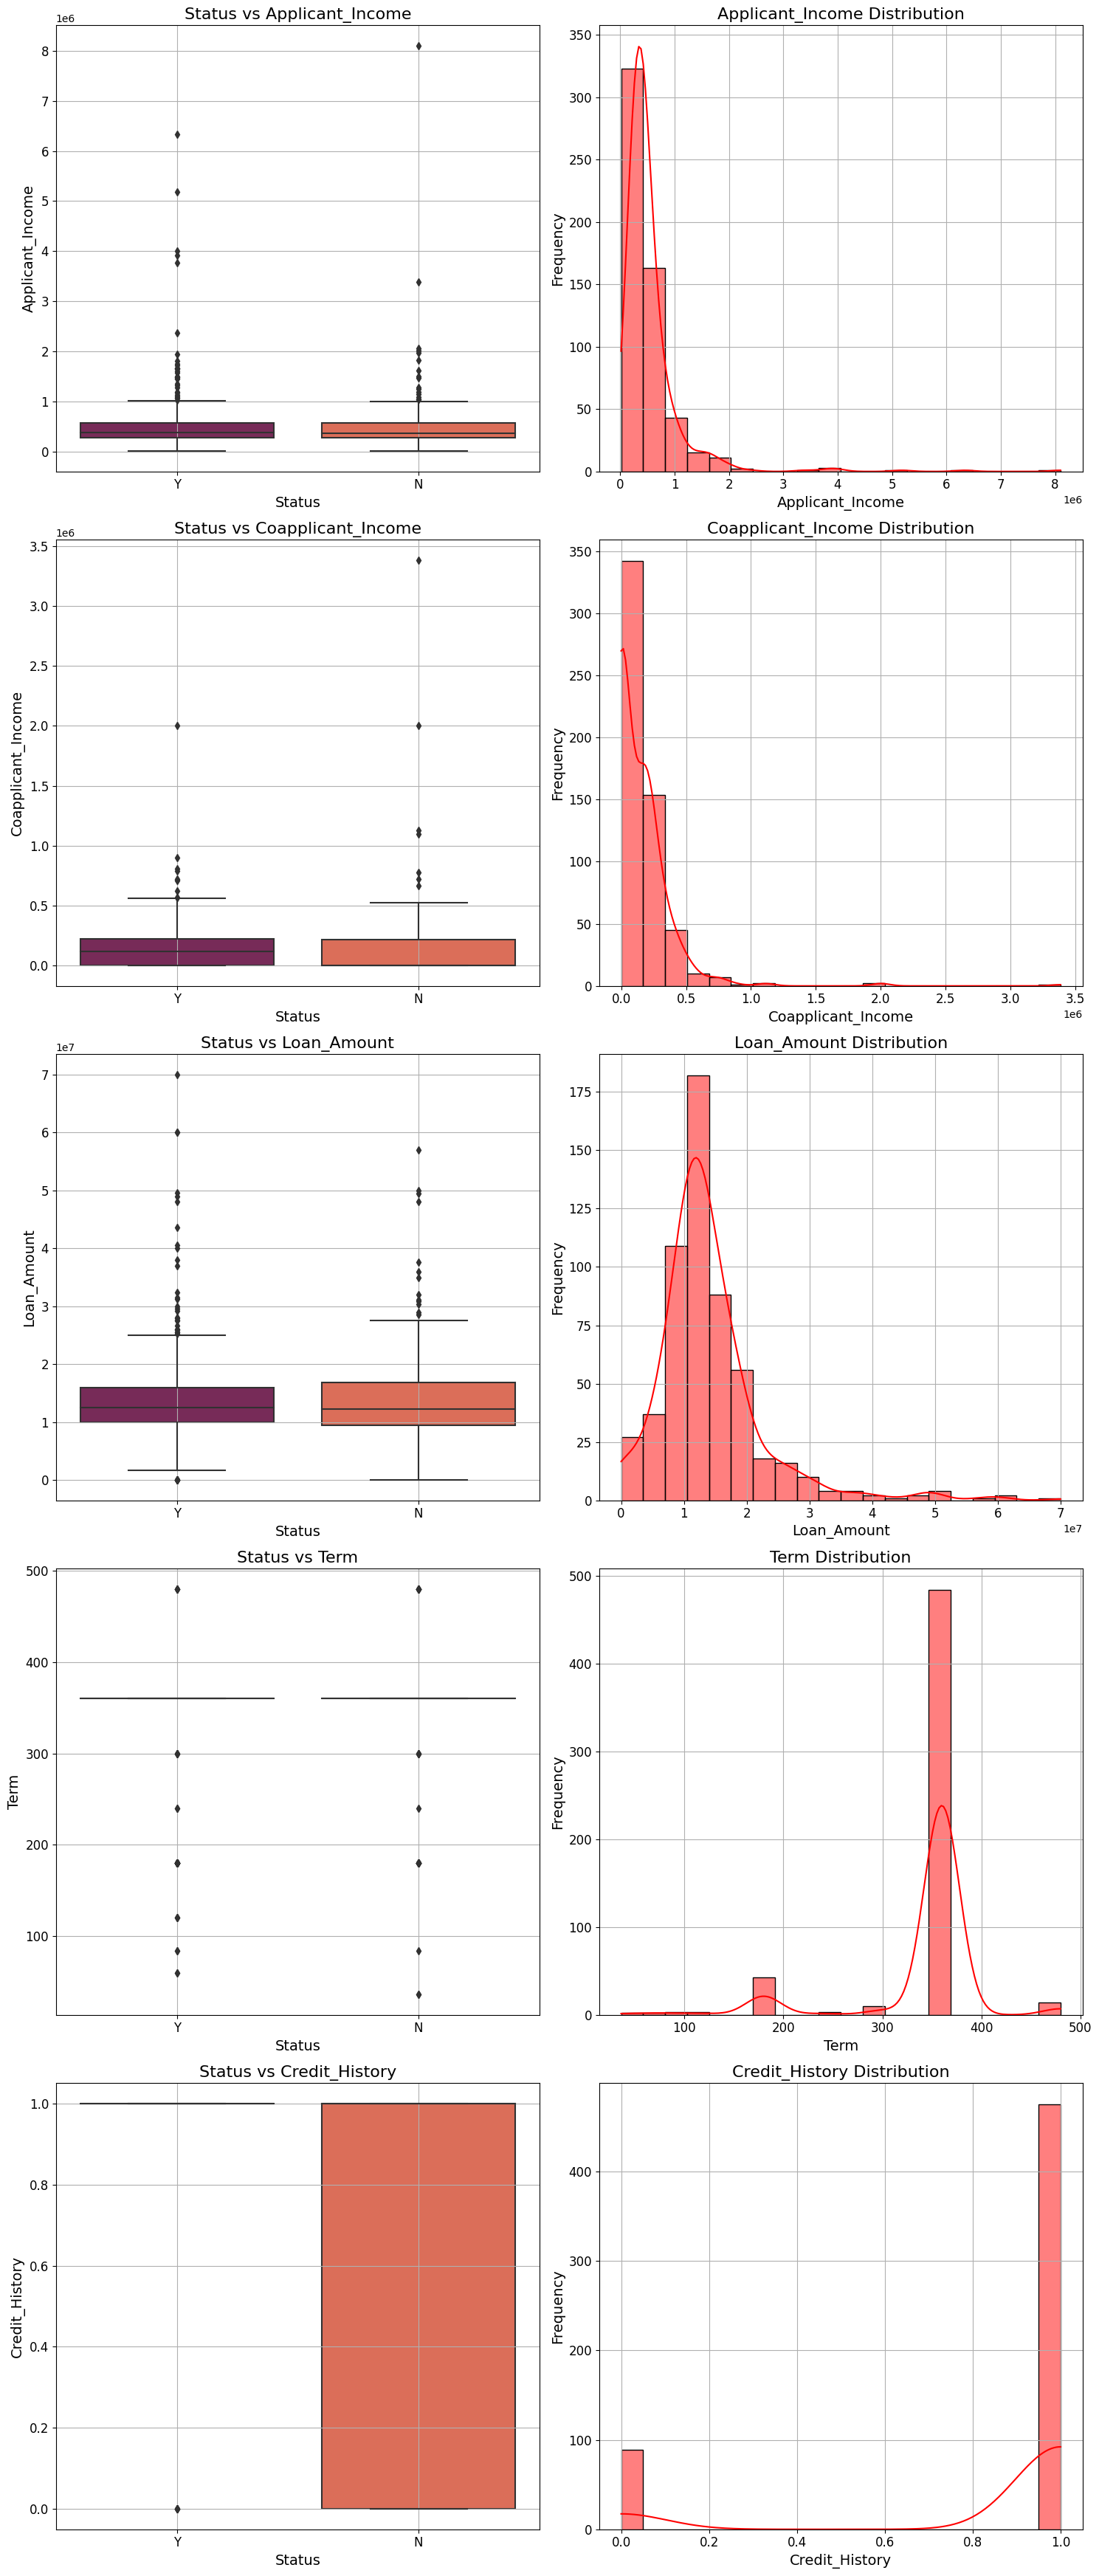

In [165]:
print('\n' + '-'*60 + '\n')
print("Creating Box Plots to Identify Inconsistent Data and Outliers")
print('\n' + '-'*60 + '\n')

# Create a figure with a grid of subplots
fig, axes = plt.subplots(nrows=len(numerical_cols), ncols=2, figsize=(15, len(numerical_cols)*7))

# Loop through each numerical column and create a boxplot on the corresponding subplot
for i, col in enumerate(numerical_cols):
    row = i // 2
    col_num = i % 2
    sns.boxplot(x='Status', y=col, data=prep_data, ax=axes[i, 0], palette='rocket')
    axes[i, 0].set_xlabel('Status', size=14)
    axes[i, 0].set_ylabel(col, size=14)
    axes[i, 0].tick_params(labelsize=12)
    axes[i, 0].set_title('Status vs ' + col, size=16)
    axes[i, 0].grid(b=True)

    sns.histplot(x=col, data=prep_data, bins=20, ax=axes[i, 1], kde=True, color='red')
    axes[i, 1].set_xlabel(col, size=14)
    axes[i, 1].set_ylabel('Frequency', size=14)
    axes[i, 1].tick_params(labelsize=12)
    axes[i, 1].set_title(col + ' Distribution', size=16)
    axes[i, 1].grid(b=True)

plt.tight_layout()
plt.show()

 <a name = Section61></a>
### **6.3 Encoding Categorical Variables**

In [166]:
# Binary encoding for 'Gender', 'Married', 'Education', 'Self_Employed', and 'Loan_Status'

prep_data['Gender'] = prep_data['Gender'].map({'Male': 0, 'Female': 1})
prep_data['Married'] = prep_data['Married'].map({'No': 0, 'Yes': 1})
prep_data['Education'] = prep_data['Education'].map({'Graduate': 1, 'Not Graduate': 0})
prep_data['Self_Employed'] = prep_data['Self_Employed'].map({'No': 0, 'Yes': 1})
prep_data['Status'] = prep_data['Status'].map({'N': 0, 'Y': 1})

# One-hot encoding for 'Area'

prep_data = pd.get_dummies(prep_data, columns=['Area'])

# OHE for 'Dependents'

prep_data = pd.get_dummies(prep_data, columns=['Dependents'])

# Binary encoding for 'Credit_History'

prep_data['Credit_History'] = prep_data['Credit_History'].astype('int')

<a name = Section61></a>
### **6.4 Feature Engineering**

In [167]:
prep_data['Total_income'] = prep_data['Applicant_Income'] + prep_data['Coapplicant_Income']

<a name = Section61></a>
### **6.5 Feature Scaling**

In [168]:
from sklearn.preprocessing import StandardScaler

# Select columns to be scaled
cols_to_scale = ['Applicant_Income', 'Coapplicant_Income', 'Loan_Amount', 'Total_income']

# Create a scaler object
scaler = StandardScaler()

# Fit the scaler object on the selected columns and transform the data
prep_data[cols_to_scale] = scaler.fit_transform(prep_data[cols_to_scale])

In [169]:
# Checking Unique Values in Dataset by taking a sample of and displaying few unique values from it.
# Frequent re-runs can help finding some datapoints of relevance to research.

print('\n' + 'Having a look at unique Values in each Column')
print('\n' + '-'*50 + '\n')

for col in prep_data.columns:
  print("Column Name: {} | Data Type: {}\n".format(col, prep_data[col].dtype))
  print(prep_data[col].sample(100).unique()[:30])
  print('\n' + '-'*70 + '\n')


Having a look at unique Values in each Column

--------------------------------------------------

Column Name: Gender | Data Type: int64

[0 1]

----------------------------------------------------------------------

Column Name: Married | Data Type: int64

[1 0]

----------------------------------------------------------------------

Column Name: Education | Data Type: int64

[1 0]

----------------------------------------------------------------------

Column Name: Self_Employed | Data Type: int64

[1 0]

----------------------------------------------------------------------

Column Name: Applicant_Income | Data Type: float64

[-2.57978363e-01  1.52136859e+00 -1.40993762e-01  4.57494988e-01
 -3.95710575e-01  6.49809373e-01 -2.56701587e-01 -1.45622075e-01
  5.65873236e-02 -4.05286395e-01 -4.02094455e-01 -4.30662318e-01
  1.20549302e+01 -2.03555786e-01 -1.13543078e-01 -2.42337857e-01
 -4.76147463e-01 -3.88369113e-01  9.62938687e-01 -2.89578570e-01
  5.83547754e-03 -2.69948139e-01 -1.

---
<a name = Section7></a>
# **7. Feature Selection & PCA**
---

### SPLIT X & Y

In [170]:
X = prep_data.drop('Status', axis=1)
y = prep_data['Status']

In [171]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.1)
print(f"Train X shape: {train_x.shape}")
print(f"Test X shape: {test_x.shape}")
print(f"Train Y shape: {train_y.shape}")
print(f"Test Y shape: {test_y.shape}")

Train X shape: (507, 17)
Test X shape: (57, 17)
Train Y shape: (507,)
Test Y shape: (57,)


<a name = Section71></a>
### **7.1 Feature Selection with Correlation Matrix**

<a name = Section71></a>
### **7.2 Feature Transformation with PCA**

---
<a name = Section8></a>
# **8. Model Development & Evaluation**
---

<a name = Section81></a>
### **8.1 Logistic Regression**

In [172]:
lgr = LogisticRegression()
lgr.fit(train_x, train_y)

LogisticRegression()

In [173]:
lgr_predictions_train = lgr.predict(train_x)
lgr_predictions_test = lgr.predict(test_x)

print("-------------- TRAIN SET -------------- ")
print(classification_report(y_true=train_y, y_pred=lgr_predictions_train))

print("-------------- TEST SET -------------- ")
print(classification_report(y_true=test_y, y_pred=lgr_predictions_test))

-------------- TRAIN SET -------------- 
              precision    recall  f1-score   support

           0       0.91      0.45      0.60       162
           1       0.79      0.98      0.88       345

    accuracy                           0.81       507
   macro avg       0.85      0.72      0.74       507
weighted avg       0.83      0.81      0.79       507

-------------- TEST SET -------------- 
              precision    recall  f1-score   support

           0       0.92      0.65      0.76        17
           1       0.87      0.97      0.92        40

    accuracy                           0.88        57
   macro avg       0.89      0.81      0.84        57
weighted avg       0.88      0.88      0.87        57



<a name = Section82></a>
### **8.2 Decision Tree**

In [174]:
dtr = DecisionTreeClassifier().fit(train_x, train_y)

In [175]:
dtr_predictions_test = dtr.predict(test_x)
dtr_predictions_train = dtr.predict(train_x)

In [176]:
print("-------------- TRAIN SET -------------- ")
print(classification_report(y_true=train_y, y_pred=dtr_predictions_train))

print("-------------- TEST SET -------------- ")
print(classification_report(y_true=test_y, y_pred=dtr_predictions_test))

-------------- TRAIN SET -------------- 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       162
           1       1.00      1.00      1.00       345

    accuracy                           1.00       507
   macro avg       1.00      1.00      1.00       507
weighted avg       1.00      1.00      1.00       507

-------------- TEST SET -------------- 
              precision    recall  f1-score   support

           0       0.62      0.76      0.68        17
           1       0.89      0.80      0.84        40

    accuracy                           0.79        57
   macro avg       0.75      0.78      0.76        57
weighted avg       0.81      0.79      0.80        57



<a name = Section83></a>
### **8.3 Random Forest**

<a name = Section84></a>
### **8.4 Naive Bayes**

---
<a name = Section9></a>
# **9. Data Resampling with SMOTE**
---

---
<a name = Section10></a>
# **10. Feature Selection and PCA**
---

<a name = Section101></a>
### **10.1 Feature Selection with Correlation Matrix**

<a name = Section101></a>
### **10.2 Feature Transformation with PCA**

---
<a name = Section11></a>
# **11. Model Development & Evaluation with SMOTE & Tuned Hyperparameters**
---

<a name = Section111></a>
### **11.1 Logistic Regression**

<a name = Section112></a>
### **11.2 Decision Tree**

<a name = Section113></a>
### **11.3 Random Forest**

<a name = Section114></a>
### **11.4 Naive Bayes**

---
<a name = Section12></a>
# **12. Summary table of Model Evaluation Metrics**
---

---
<a name = Section13></a>
# **13. Conclusion**
---

<center>
  <a href="https://thedatascienceguy.go.studio/">
    <img src="https://raw.githubusercontent.com/Mihir-Ai-lab/The_Data_Science_Guy/main/Images/Notebook%20Footer.png" width="1200" height="627" />
  </a>
</center>

In [177]:
## CORRELATION ANALYSIS
## FEATURE TRANSFORMATIONS
## FEATURE ENGINEERING ( TOTAL INCOME = SUM (INCOME COLS) )

## PCA -> LOGISTIC REGRESSION
## NAIVE BAYES
## HYPER PARAMETER TUNING DECISION TREES   ( GRID SEARCH )
## RANDOM FOREST
## HYPER PARAMETER TUNING RANDOM FOREST    ( GRID SEARCH )
## PCA -> RF